<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [7]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [9]:
## Write your code here
print("Column & data types Are:\n",df.dtypes)
print("Summary :\n",df.describe())

Column & data types Are:
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
Summary :
          ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000   

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [10]:
## Write your code here
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
# Step 2: Handle missing values
# Example: Remove rows where more than 50% of the data is missing
df = df.dropna(thresh=df.shape[1] * 0.5, axis=0)

# Example: Impute missing values
# Numeric columns: Fill with the mean
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

# Categorical columns: Fill with the mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("Missing values after handling:\n", df.isnull().sum())

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
Missing values after handling:
 ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


In [11]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,84795.90598,6.936006
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Primary/elementary school,"School (i.e., University, College, etc);Online...",Technical documentation;Blogs;Written Tutorial...,...,24.446732,23.059479,20.363624,16.232176,11.000196,9.992257,Appropriate in length,Easy,84795.90598,6.936006
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,24.446732,23.059479,20.363624,16.232176,11.000196,9.992257,Appropriate in length,Difficult,84795.90598,6.936006
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,24.446732,23.059479,20.363624,16.232176,11.000196,9.992257,Too long,Easy,84795.90598,6.936006
10,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,25.000000,10.000000,0.000000,15.000000,0.000000,0.000000,Appropriate in length,Easy,84795.90598,8.000000


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [12]:
## Write your code here
print(df['Employment'].value_counts())
print(df['JobSat'].value_counts())
print(df['YearsCodePro'].value_counts())


Employment
Employed, full-time                                                                                                                                                     30616
Independent contractor, freelancer, or self-employed                                                                                                                     3270
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                 3007
Student, full-time                                                                                                                                                       1384
Employed, part-time                                                                                                                                                       788
                                                                                                                       

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


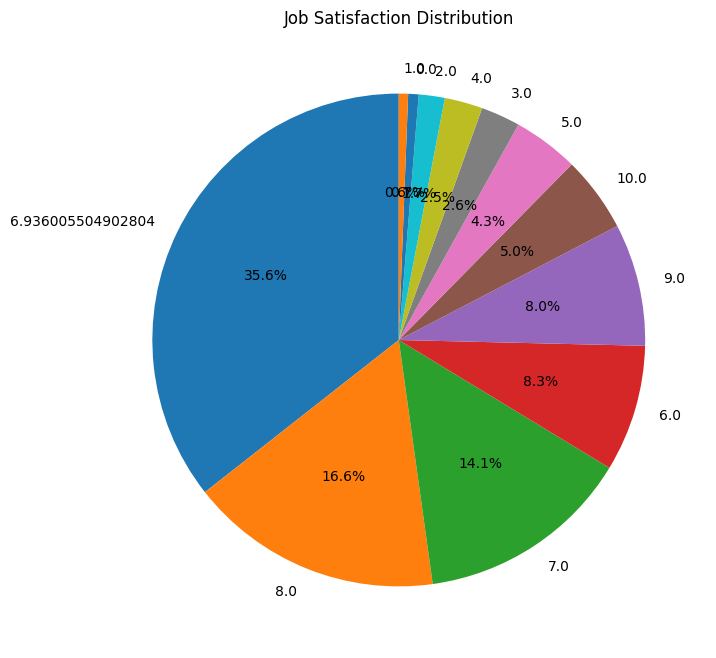

In [13]:
## Write your code here
# Count the occurrences of each category in JobSat
job_sat_counts = df['JobSat'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Remove default ylabel
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [16]:
!pip install matplotlib_venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 66.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=ea33dcdc576854cfb814a3389f98b3e3eac4f2277584806c4a6dddd0cf97e1fd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/08/28/f0/0a3240d632a27df6da04d2888a6b058c37e1cbbb425ec5d2cc
Successfully built matplotlib_venn


LanguageHaveWorkedWith
JavaScript                 29626
SQL                        25031
HTML/CSS                   24856
Python                     23176
TypeScript                 19665
Bash/Shell (all shells)    16338
Java                       13853
C#                         13125
C++                         9616
PHP                         8601
C                           8244
PowerShell                  6864
Go                          6698
Rust                        5725
Kotlin                      4600
Dart                        2919
Lua                         2663
Ruby                        2623
Swift                       2216
Assembly                    2096
Visual Basic (.Net)         1895
R                           1864
Groovy                      1702
MATLAB                      1694
VBA                         1629
Scala                       1262
Perl                        1100
Elixir                      1032
GDScript                     975
Objective-C         

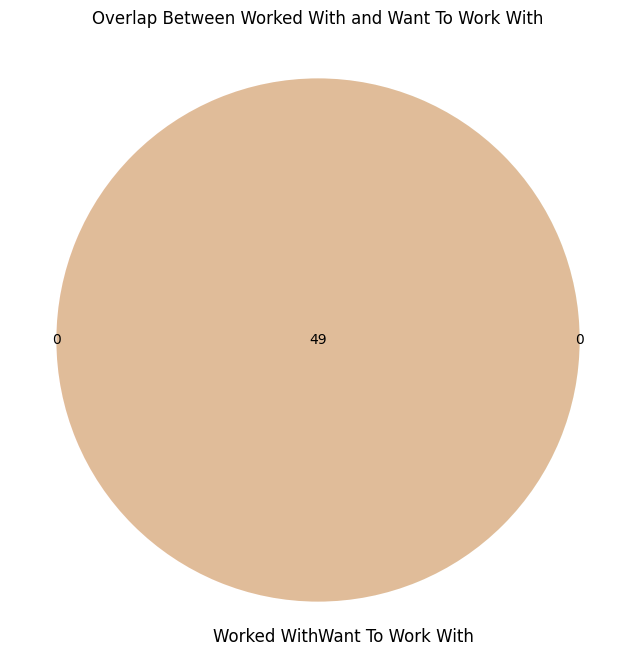

In [66]:
# Write your code here
from collections import Counter
from matplotlib_venn import venn2
# Split the language columns into lists
worked_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
wanted_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()
print(worked_languages.value_counts())
print(wanted_languages.value_counts())


# Step 2: Visualize
# Option 1: Venn Diagram
worked_set = set(worked_languages)
wanted_set = set(wanted_languages)
plt.figure(figsize=(8, 8))
venn = venn2([worked_set, wanted_set], ('Worked With', 'Want To Work With'))
plt.title('Overlap Between Worked With and Want To Work With')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


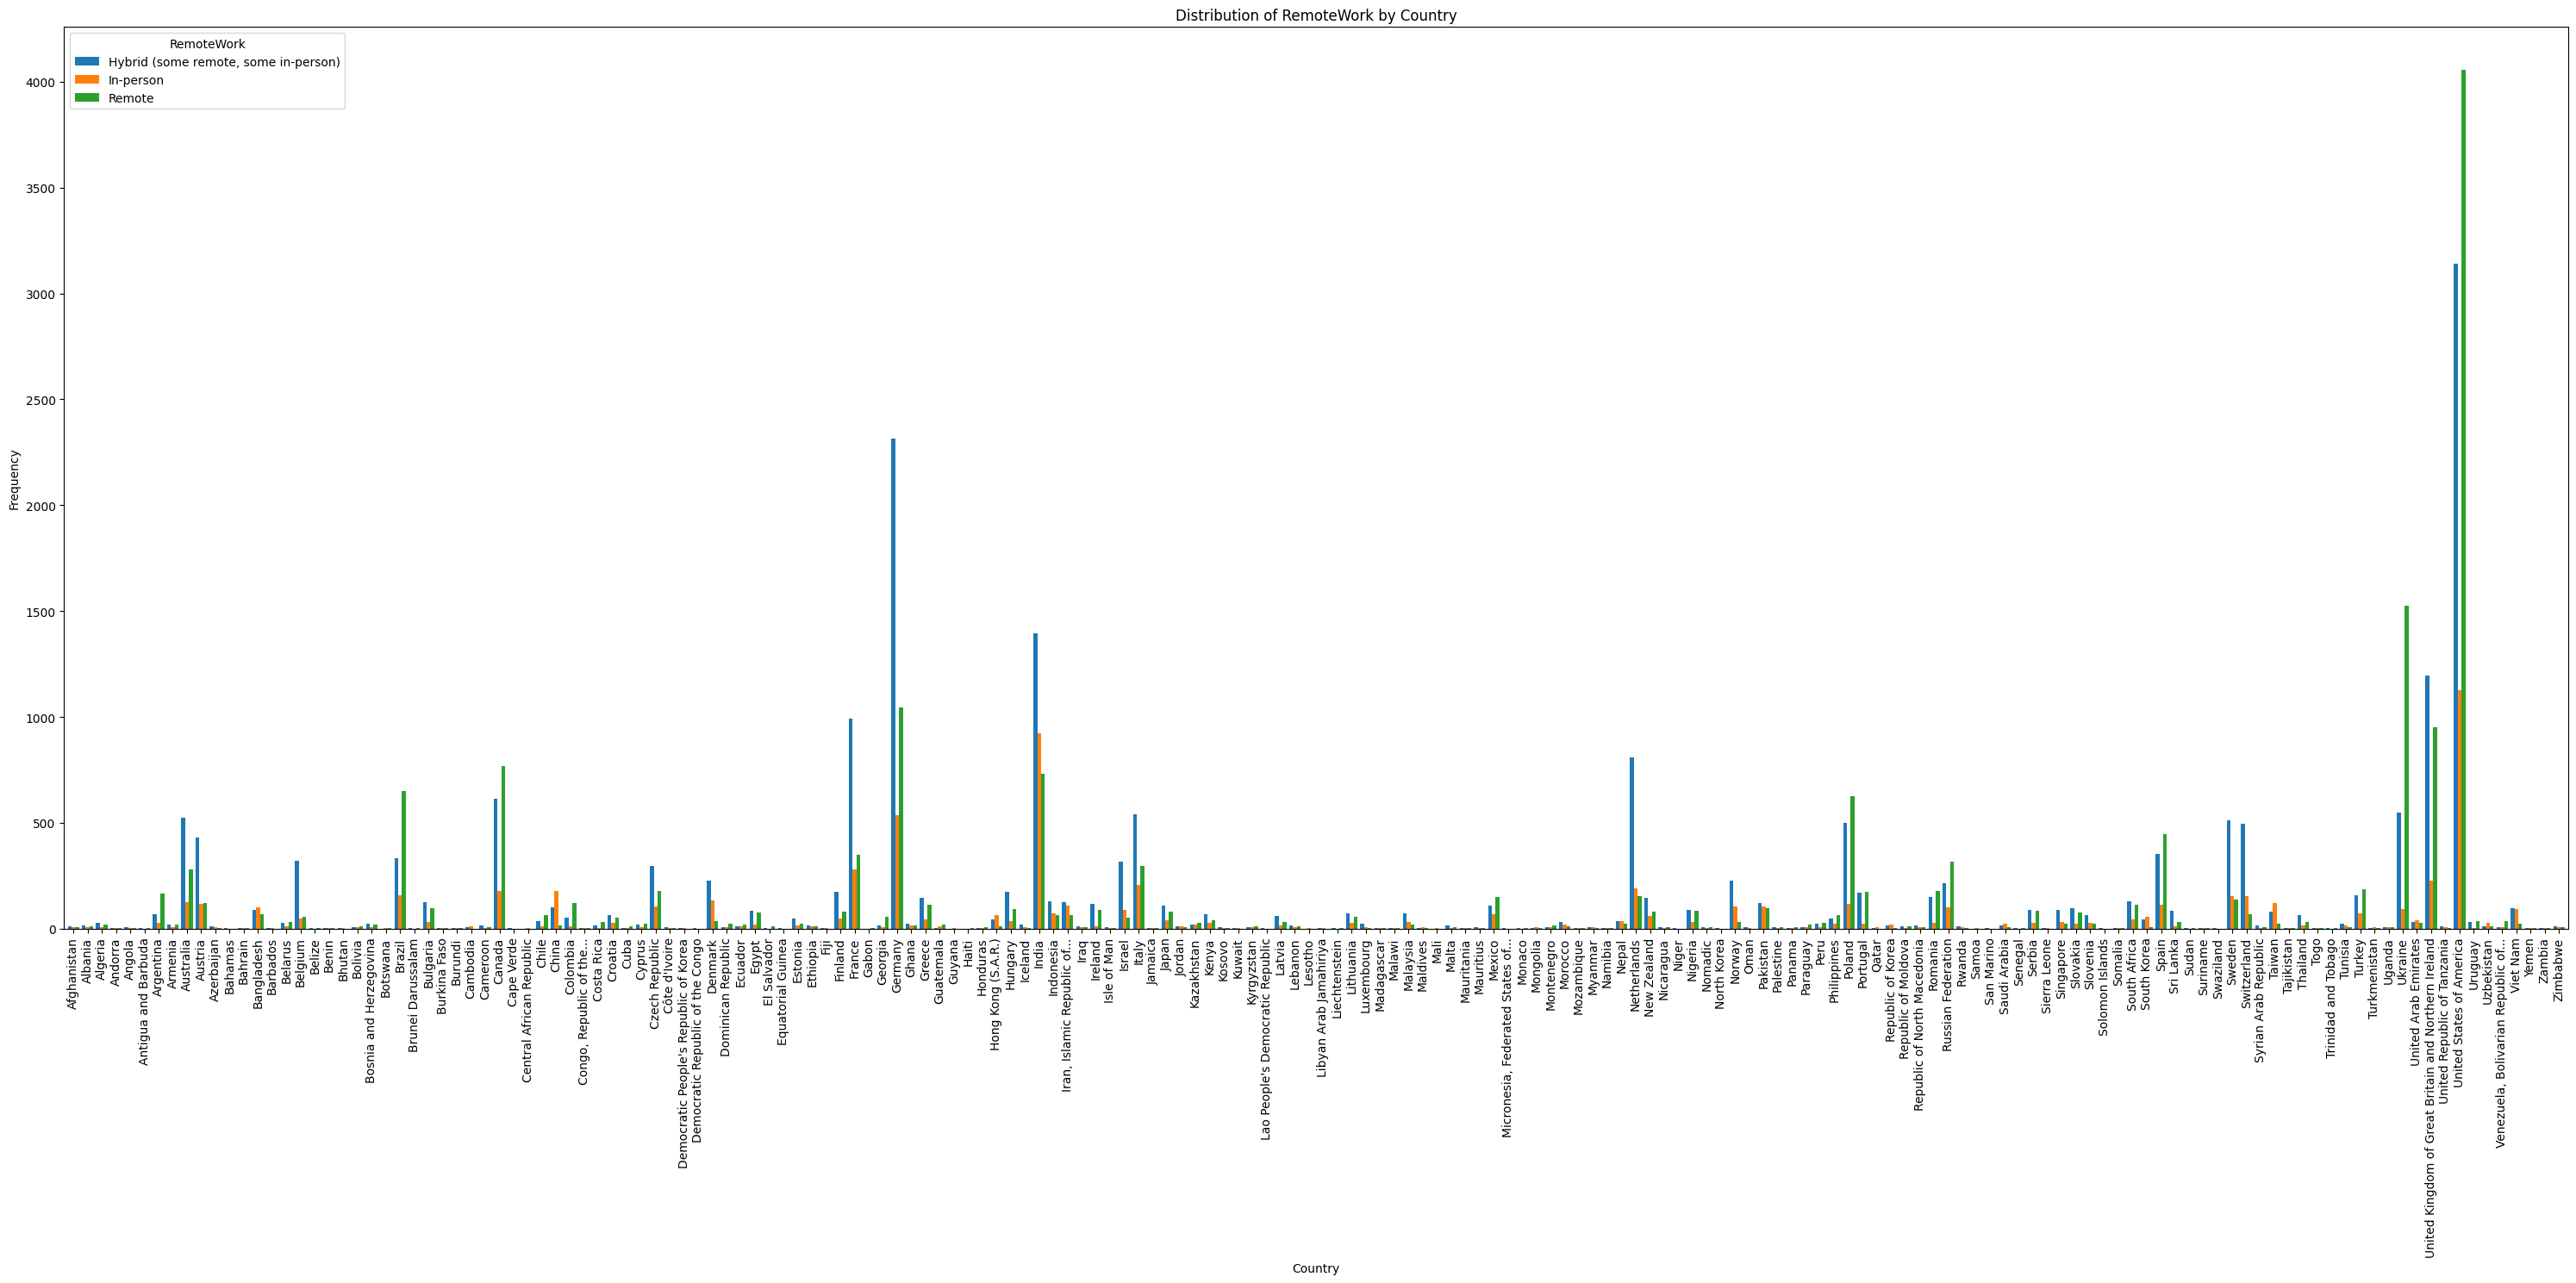

In [46]:
## Write your code here
# Count occurrences of each RemoteWork type by Country
remote_distribution = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)


# Plot grouped bar chart
remote_distribution.plot(kind="bar", stacked=False, figsize=(30, 15), width=0.8)

# Customize chart
plt.title("Distribution of RemoteWork by Country")
plt.ylabel("Frequency")
plt.xlabel("Country")

plt.legend(title="RemoteWork")
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [53]:
## Write your code here
from scipy import stats
df['JobSat']=df['JobSat'].astype('int')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50
})
df['YearsCodePro']=df['YearsCodePro'].astype('int')
pearson_coef,p_value=stats.pearsonr(df['JobSat'],df['YearsCodePro'])
print(pearson_coef,p_value)

0.0989152279798405 1.7102337190792687e-98


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


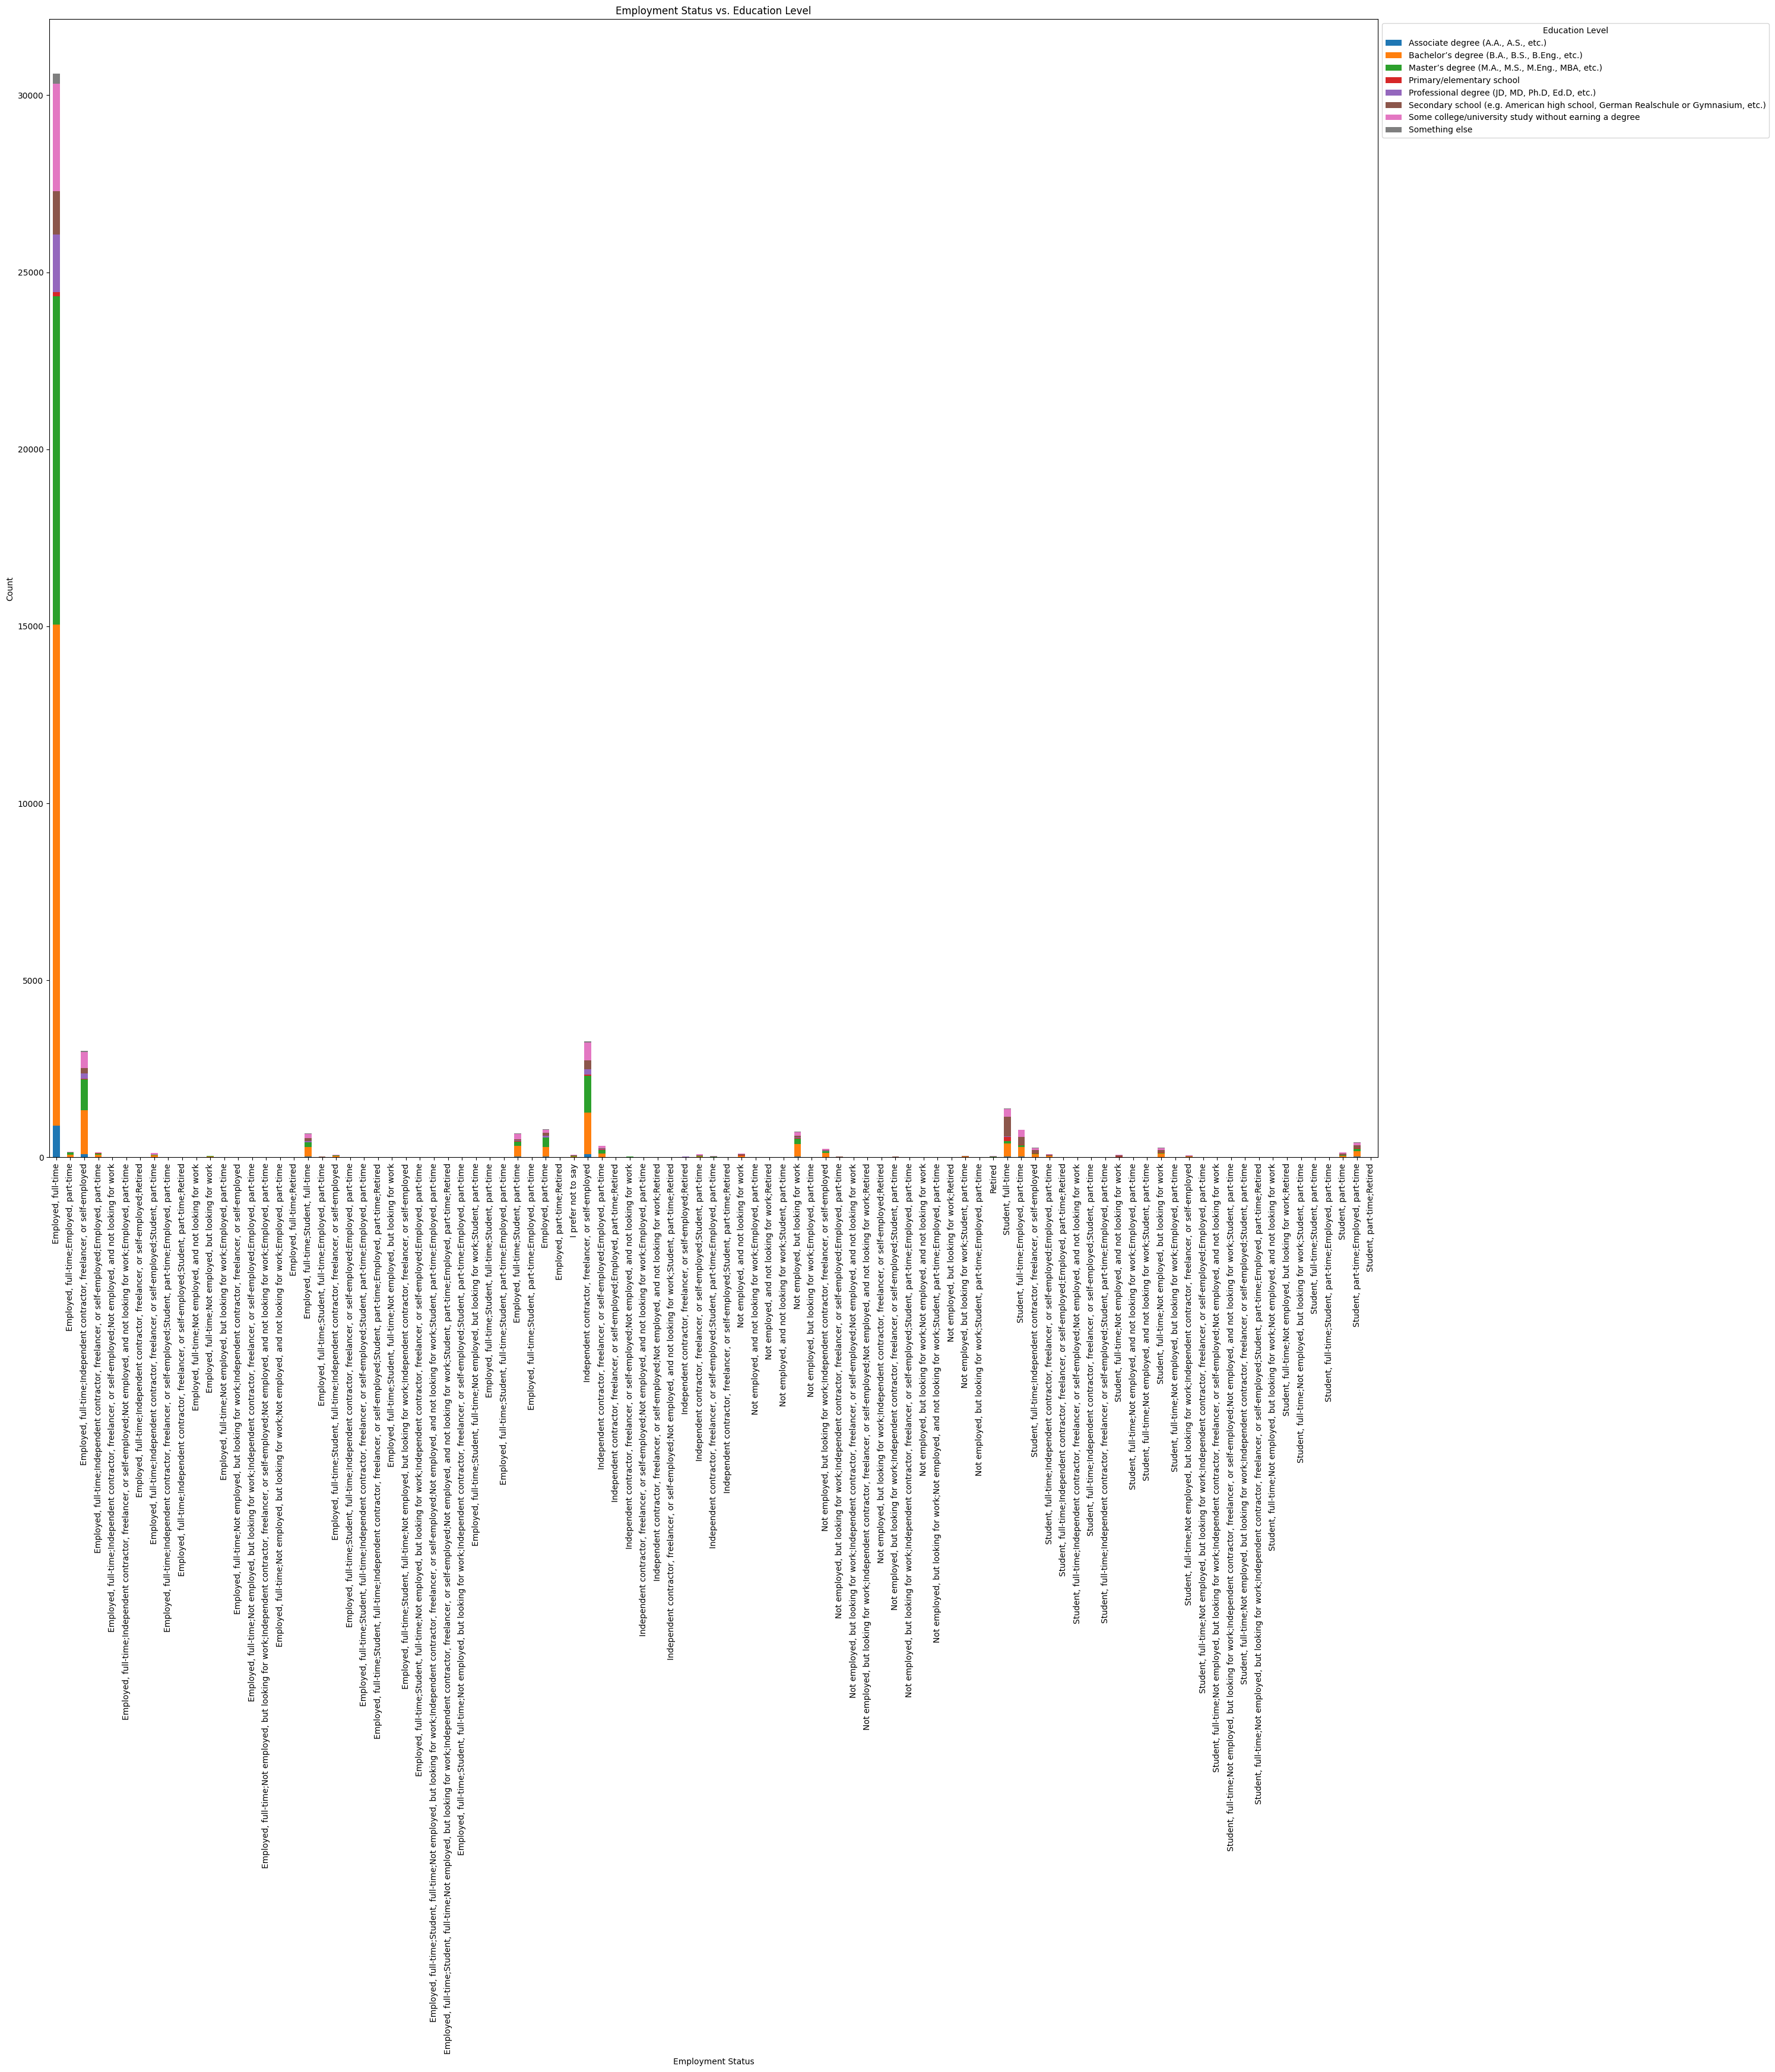

In [67]:
## Write your code here
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])
cross_tab.plot(kind='bar', stacked=True, figsize=(30, 35))
plt.title('Employment Status vs. Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [68]:
## Write your code here
# Save as CSV
df.to_csv('cleaned_analyzed_Data_Distributed.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
